# Description and Details:
In this notebook, we will implement gradient descent with ridge from scratch.
* Write a function to convert dataframe to numpy array
* Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* Write a prediction function given feature matrix and weights; a derivative function given errors, feature, weight, penalty; a gradient descent function to compute the regression weights given an initial weight vector, step_size, L2 penalty, maximum iteration
* Implement ridge regression learning algorithm using gradient descent from scratch, compare the effects of penalty level on coefficients

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Load Data

In [16]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv("kc_house_data_hw2.csv", dtype = dtype_dict)

## Get Numpy Array

In [17]:
def get_numpy_data(data, features, output):
    data['constant'] = 1 
    features = ['constant'] + features 
    feature_matrix = data[features].to_numpy()
    output_array = data[output].to_numpy()
    return(feature_matrix, output_array)

## Compute Prediction

In [18]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return predictions

## Compute Derivative

In [19]:
# compute derivative for single feature
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative = -2 * np.dot(errors, feature)
    else:
        derivative = -2 * np.dot(errors, feature) + 2 * l2_penalty * weight
    return derivative

In [20]:
# test functions:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (-np.sum(errors*example_features[:,1])*2+20)
print ('')

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (-np.sum(errors)*2)

56554166815990.0
56554166815990.0

22446749330.0
22446749330.0


## Gradient Descent with ridge

In [21]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 
                                      l2_penalty, max_iteration):
    weights = np.array(initial_weights) # make sure it is a numpy array
    converged = False
    iteration = 0
    #while not reached maximum number of iteration:
    while not converged:
        predictions = predict_output(feature_matrix, weights)
        errors = output - predictions
        for j in range(len(weights)):
            if j == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,j], weights[j], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,j], weights[j], l2_penalty, False)
            weights[j] = weights[j]-step_size*derivative
        iteration +=1
        if iteration >= max_iteration:
            converged = True
    return weights

In [22]:
# An alternative way:
def ridge_regression_gradient_descent1(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print ('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 
    print_frequency = 1  # for adjusting frequency of debugging output
    
    #while not reached maximum number of iterations:
    while iteration < max_iterations:
        iteration += 1 
        
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' , str(iteration))
        ### === end code section ===
        

        predictions = predict_output(feature_matrix,weights)
        errors = output - predictions
        if iteration%print_frequency==0:
            print ('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)): 
            if i ==0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            weights[i] = weights[i] - step_size * derivative
    print ('Done with gradient descent at iteration ', iteration)
    print ('Learned weights = ', str(weights))
    return weights

### No regularization

In [23]:
train_data = pd.read_csv("kc_house_train_data.csv")
test_data = pd.read_csv("kc_house_test_data.csv")

In [24]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [25]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             [0., 0.], 1e-12, 0, 1000)  # be careful to set float here
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

In [26]:
# using the alternative function
simple_weights_0_penalty = ridge_regression_gradient_descent1(simple_feature_matrix, output, 
                                                             [0., 0.], 1e-12, 0, 1000)  # be careful to set float here
simple_weights_0_penalty

Starting gradient descent with l2_penalty = 0
Iteration =  1
Cost function =  7433051852335772.0
Iteration =  2
Cost function =  5394267213533688.0
Iteration =  3
Cost function =  4023237736286403.5
Iteration =  4
Cost function =  3101256183295487.5
Iteration =  5
Cost function =  2481247643601011.5
Iteration =  6
Cost function =  2064308076801446.8
Iteration =  7
Cost function =  1783927096156441.0
Iteration =  8
Cost function =  1595378201854742.2
Iteration =  9
Cost function =  1468583989698184.5
Iteration =  10
Cost function =  1383318190090050.8
Iteration =  20
Cost function =  1211562139024524.2
Iteration =  30
Cost function =  1208313761205656.5
Iteration =  40
Cost function =  1208252324779675.2
Iteration =  50
Cost function =  1208251162139724.5
Iteration =  60
Cost function =  1208251139442068.0
Iteration =  70
Cost function =  1208251138303840.8
Iteration =  80
Cost function =  1208251137573361.5
Iteration =  90
Cost function =  1208251136850594.0
Iteration =  100
Cost funct

array([-1.63113515e-01,  2.63024369e+02])

In [27]:
# use predict_output function
predict_output(simple_feature_matrix, simple_weights_0_penalty)

array([310368.59226564, 675972.46512752, 202528.60098983, ...,
       402427.12140352, 420838.8272311 , 268284.69323118])

### high regularization

In [28]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                                [0.,0.], 1e-12, 1e11, 1000)
simple_weights_high_penalty

array([  9.76730382, 124.57217567])

In [29]:
predict_output(simple_feature_matrix, simple_weights_high_penalty)

array([147004.93459931, 320160.25878636,  95930.34257291, ...,
       190605.19608526, 199325.24838244, 127073.38649144])

### visualize coefficients

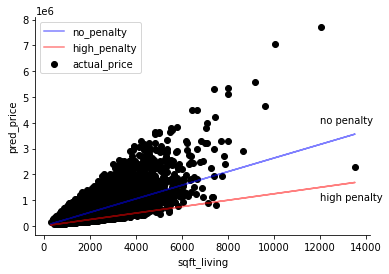

In [30]:
fig, ax = plt.subplots() 
plt.scatter(simple_feature_matrix[:,1], output ,color='black', label = 'actual_price')  
ax.plot(simple_feature_matrix[:,1],predict_output(simple_feature_matrix, simple_weights_0_penalty), color='blue', alpha = 0.5, linestyle = '-', label = 'no_penalty')  
ax.plot(simple_feature_matrix[:,1],predict_output(simple_feature_matrix, simple_weights_high_penalty), color='red', alpha = 0.5, linestyle = '-', label = 'high_penalty')  

ax.set_xlabel('sqft_living')
ax.set_ylabel('pred_price')  
#ax.set_title('predictions')

# Remove the top and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

# Put text on the figure. 
ax.text(12000, 4*1e6, 'no penalty')           
ax.text(12000, 1*1e6, 'high penalty')                          

# add legend
ax.legend()
plt.show()

### compute RSS on test data
Compute the RSS on the TEST data for the following three sets of weights:

* The initial weights (all zeros)
* The weights learned with no regularization
* The weights learned with high regularization

In [31]:
predictions = predict_output(simple_test_feature_matrix, [0.,0.])
error = test_output - predictions
RSS = np.dot(error,error)
print (RSS)

1784273286136298.0


In [32]:
predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
error = test_output - predictions
RSS = np.dot(error,error)
print (RSS)

275723632153607.47


In [33]:
predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
error = test_output - predictions
RSS = np.dot(error,error)
print (RSS)

694642101489902.5


## Running a multiple regression with L2 penalty

In [34]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [35]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

### No regularization

In [36]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)

### high regularization

In [37]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)

### compute RSS on test data

In [38]:
predictions = predict_output(test_feature_matrix, initial_weights)
error = test_output - predictions
RSS = np.dot(error,error)
print (RSS)

1784273286136298.0


In [39]:
predictions = predict_output(test_feature_matrix, multiple_weights_0_penalty)
error = test_output - predictions
RSS = np.dot(error,error)
print (RSS)

274067615918575.56


In [40]:
predictions = predict_output(test_feature_matrix, multiple_weights_high_penalty)
error = test_output - predictions
RSS = np.dot(error,error)
print (RSS)

500404800500841.7
